In [7]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer

#Import custom module
import sys
import os
sys.path.insert(0,os.path.abspath("../scripts"))
import eda_functions as eda
import importlib
importlib.reload(eda)


# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Set visualization style
sns.set(style="whitegrid")


In [8]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Descriptive Statistics

## Basic Statistics for Textual Lengths

In [9]:
headline_stats = eda.headline_length(df)
print(headline_stats)




count    1407328.00
mean          11.42
std            6.35
min            1.00
25%            7.00
50%           10.00
75%           13.00
max           77.00
Name: headline_length, dtype: float64


Number of Articles per Publisher

In [15]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


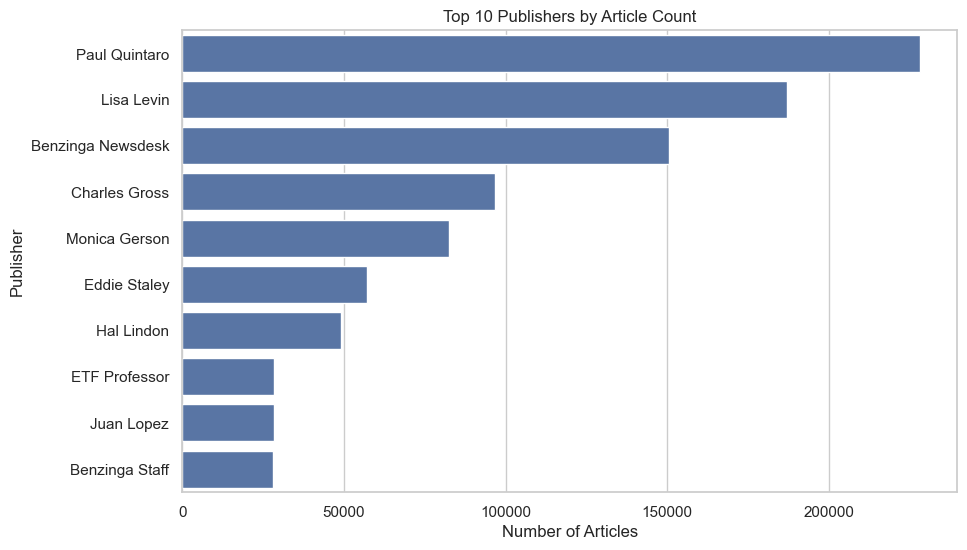

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=publisher_counts.values[:10], y=publisher_counts.index[:10])
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Analysis of Publication Dates

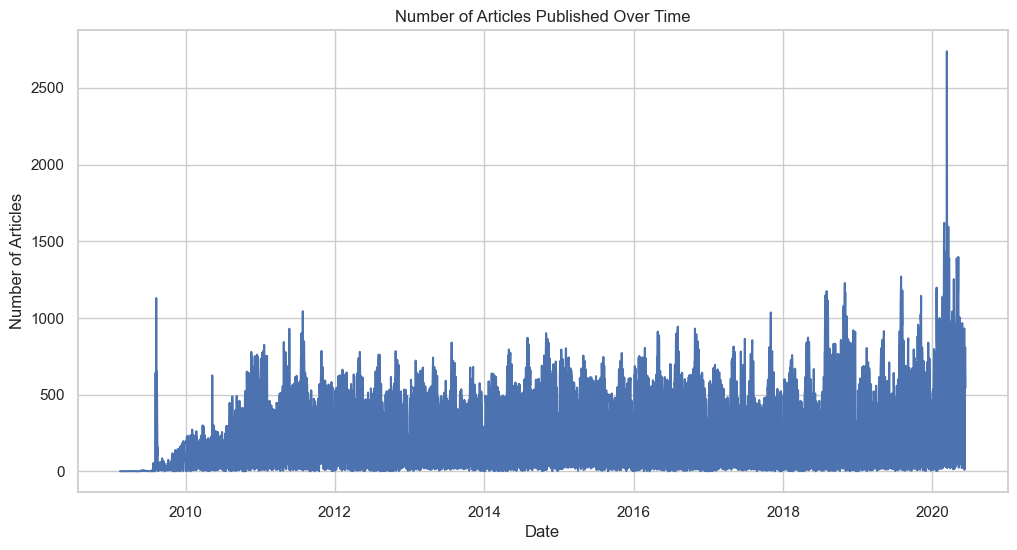

In [13]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601', utc=True)
df['day'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()

# Plot articles per day
articles_per_day = df['day'].value_counts().sort_index()

plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()
